In [23]:
#必要なライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [40]:
#乱数固定
np.random.seed(20)

#青の座標作成
X0 = np.random.randn(100, 2)
#赤の座標作成
X1 = np.random.randn(100, 2) + np.array([2.5, 2.5])
#青と赤を合体
X = np.r_[X0, X1]

#点に値設定する(青 = 1, 赤 = -1)
y = np.array([1] * 100 + [-1] * 100)

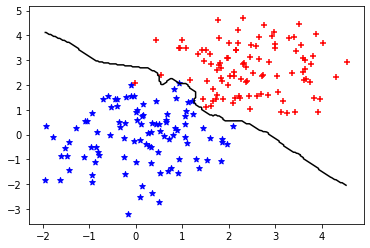

In [43]:
n_neighbors=5
weights='uniform'

#kNNのインスタンス作成
model = KNeighborsRegressor(n_neighbors=n_neighbors,
                            weights=weights)
#教師データ入れてモデル作成
model.fit(X, y)

xmin, xmax = X[:, 0].min(), X[:, 0].max()
ymin, ymax = X[:, 1].min(), X[:, 1].max()

#点プロット(青、赤)
plt.scatter(X0[:, 0], X0[:, 1], color="b", marker="*")
plt.scatter(X1[:, 0], X1[:, 1], color="r", marker="+")

#線引くためにグリッド作成
xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, 200),
                           np.linspace(ymin, ymax, 200))
#グリッドの点毎に値を予測
Z = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)

#0になるところの線引く
plt.contour(xmesh, ymesh, Z, levels=[0], colors="k")

#print("正しく分類できた数:", (model.predict(X) == y).sum(), "/", len(X))

plt.show()